In [1]:
#Instance vs Parameter-based

In [2]:
#KNN is instance-based
import numpy as np

In [6]:
#Euclidean (L2)
#(x1,y1),(x2,y2)
a=[1,2,3]
b=[4,5,6]
a=np.array(a)
b=np.array(b)
l2=np.sum((b-a)**2)**0.5
print("L2 Euclidian dist is:")
print('\t\t\t',l2,'\n')
#Manhattan (L1)
print("L1 Manhattan dist is:")
l1=np.sum(abs(a-b))
print('\t\t\t',l1)

L2 Euclidian dist is:
			 5.196152422706632 

L1 Manhattan dist is:
			 9


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

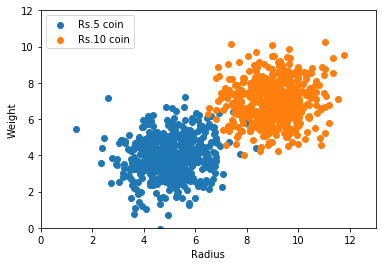

In [8]:
mean1=np.array([5,4]) #mean
cov1=np.array([[1,0.1],[0.1,1.2]]) #covariance
dist1=np.random.multivariate_normal(mean1,cov1,500)
mean2=np.array([9,7]) #mean
cov2=np.array([[1,0.1],[0.1,1.2]]) #covariance
dist2=np.random.multivariate_normal(mean2,cov2,500)
plt.scatter(dist1[:,0],dist1[:,1],label='Rs.5 coin')
plt.scatter(dist2[:,0],dist2[:,1],label='Rs.10 coin')
plt.xlabel('Radius')
plt.ylabel('Weight')
plt.legend()
plt.xlim(0,13)
plt.ylim(0,12)
plt.show()

In [9]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1     #List is vectorized
print(data.shape)
data.mean(axis=0)   #Takes the mean of each column


(1000, 3)


array([6.99709335, 5.46603335, 0.5       ])

In [10]:
print(data[:10])

[[3.52770213 3.60417049 0.        ]
 [5.40850435 3.59762094 0.        ]
 [5.88020275 3.71192754 0.        ]
 [3.49797255 2.67927376 0.        ]
 [2.74902048 3.84397664 0.        ]
 [5.25125543 2.36663768 0.        ]
 [5.62942922 4.28576286 0.        ]
 [5.65283696 2.87389983 0.        ]
 [3.39721882 2.86744458 0.        ]
 [2.90426108 3.5149128  0.        ]]


In [11]:
np.random.shuffle(data)                # 0 represents Rs.5 coins & 1 represents Rs.10 ones
print(data[:10])

[[9.93359244 5.13508663 1.        ]
 [4.70813105 4.13529748 0.        ]
 [7.30932984 5.33546777 1.        ]
 [6.64564836 5.55918997 0.        ]
 [4.98750926 4.59996895 0.        ]
 [9.93128524 8.14273049 1.        ]
 [4.16403877 3.7242057  0.        ]
 [7.63408816 7.28632343 1.        ]
 [6.15142373 3.73695709 0.        ]
 [3.9434767  5.97470107 0.        ]]


In [12]:
def distance(a,b):
    return np.sum((b-a)**2)**0.5 #L2 distance(Euclidean)

In [13]:
def knn(x_train,y_train,test_point,k=10):
    vals=[]
    for i in range(x_train.shape[0]): #Tuple has dimension 1000,2 
        d=distance(x_train[i],test_point) #Always check arguments ki kitni values hai
        vals.append([d, y_train[i]])
        
    sorted_labels=sorted(vals,key=lambda vals:vals[0])
    neighbors= np.asarray(sorted_labels)[:k,-1] # np.asarray saves memory by not duplicating
    #print("The K-Nearest-Neighbors are: ",neighbors) #To see all the neares neighbors
    freq = np.unique(neighbors, return_counts=True) #prints unique value but counts helps to count 
    index = freq[1].argmax()  #returns the index of where the most no. of times a nearby value occurs
    return freq[0][index]  #returns the type of coin that has most nearest neighbors
    

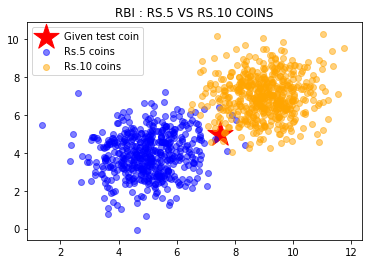

It's a Rs.10 coin, mate!


In [25]:
x_train = data[:,:2]
y_train = data[:,-1]
test_point = np.array( [7.5,5] )

plt.scatter(test_point[0],test_point[1],label='Given test coin',marker='*',s= 700,c='r')
plt.scatter(dist1[:,0],dist1[:,1], label='Rs.5 coins',alpha=0.5,c='blue')
plt.scatter(dist2[:,0],dist2[:,1],label='Rs.10 coins',alpha=0.5,c='orange')
plt.title("RBI : RS.5 VS RS.10 COINS")
plt.legend()
plt.show()

answer= knn(x_train,y_train,test_point)
if(answer==1.0):
    print("It's a Rs.10 coin, mate!")
elif(answer==0.0):
    print("It's a Rs.5 coin, mate!")

In [15]:
split=int(0.75*data.shape[0])
x_train=data[:split,:2]
y_train=data[:split,-1]
x_test=data[split:,:2]
y_test=data[split:,-1]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [16]:
def acc(k):
    
    predictions=[]
    
    for i in range(x_test.shape[0]):
        test_point = x_test[i]
        predicted_label=knn(x_train, y_train, test_point,k)
        predictions.append(predicted_label)
    pred=np.asarray(predictions)
    # print(y_test==pred) #This is to see all test cases results
    
    return ( 100 *(y_test==pred).sum()/len(pred) ) 

In [17]:
for i in range (1,10):
    print (f"Accuracy of this KNN algo for k={i} is: {acc(i)}")

Accuracy of this KNN algo for k=1 is: 98.4
Accuracy of this KNN algo for k=2 is: 97.6
Accuracy of this KNN algo for k=3 is: 98.8
Accuracy of this KNN algo for k=4 is: 98.8
Accuracy of this KNN algo for k=5 is: 99.2
Accuracy of this KNN algo for k=6 is: 99.2
Accuracy of this KNN algo for k=7 is: 99.2
Accuracy of this KNN algo for k=8 is: 99.2
Accuracy of this KNN algo for k=9 is: 99.2


In [21]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
print( "Accuracy for KNN is : ",neigh.score(x_test,y_test) )

Accuracy for KNN is :  0.992
